# `Modeling`

Modeling is done with three algorithms "Decision Tree" and "Random Forest" and "Support Vector Machine".<p>

Before we do anything, we'll normalize our data, but note that only columns with numeric values need to do this, categorical and boolean columns don't.<p>

In [4]:
! pip install termcolor


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#### importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pickle

# import ydata_profiling
from termcolor import colored  ##Color change library
#### modeling libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler ,LabelEncoder
from sklearn.model_selection import  KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix, mean_squared_error, ConfusionMatrixDisplay

#LogReg.classes_
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



## `Normalization`

In [6]:
train_df = pd.read_pickle('../data/processed/1_preprocessed_df.pkl')
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [7]:
# Construct an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5))
# Normalization of selected columns
df2 = train_df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]
df2_normalized = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

# Merge normalized columns with original columns from df1
df_norm= pd.concat([df2_normalized, train_df[['blue','dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']]], axis=1)

df_norm

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,1.911156,3.72,1.210526,1.322581,3.222222,4.600000,1.571429,1.4,1.040816,1.683578,...,2.142857,2.555556,4.777778,0,0,0.0,0,0,1,1
1,2.389446,1.00,1.000000,4.290323,3.666667,2.866667,2.142857,2.2,2.846939,4.973298,...,4.428571,1.666667,2.111111,1,1,1.0,1,1,0,2
2,1.165665,1.00,1.421053,3.516129,4.555556,3.166667,3.285714,2.2,3.577551,4.246996,...,2.714286,1.444444,2.555556,1,1,1.0,1,1,0,2
3,1.304609,4.20,1.000000,1.516129,4.111111,2.700000,3.857143,2.8,3.481633,4.433912,...,4.142857,2.777778,3.000000,1,0,0.0,1,0,0,2
4,4.527054,2.12,3.736842,3.709677,3.222222,3.033333,1.571429,3.8,3.465306,2.901202,...,1.857143,1.444444,3.888889,1,0,1.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.782899,1.00,1.000000,1.000000,4.111111,1.866667,3.857143,3.8,3.493878,4.711615,...,3.285714,1.888889,4.777778,1,1,1.0,1,1,0,0
1996,4.911824,4.36,1.000000,3.387097,1.444444,4.566667,2.714286,1.6,2.867347,4.911883,...,2.714286,3.222222,4.111111,1,1,0.0,1,1,1,2
1997,4.767535,1.64,1.210526,3.193548,3.666667,1.933333,5.000000,1.6,2.771429,4.022697,...,2.142857,1.222222,1.666667,0,1,1.0,1,1,0,3
1998,3.701403,1.64,1.842105,3.838710,1.000000,3.166667,3.285714,2.0,1.685714,1.453939,...,4.714286,3.222222,4.777778,0,0,1.0,1,1,1,0


## `1. Decision Tree Model`

****************************************confusion_matrix****************************************
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        92
           1       0.74      0.88      0.80        96
           2       0.84      0.66      0.74       106
           3       0.85      0.92      0.88       106

    accuracy                           0.83       400
   macro avg       0.84      0.84      0.83       400
weighted avg       0.84      0.83      0.83       400



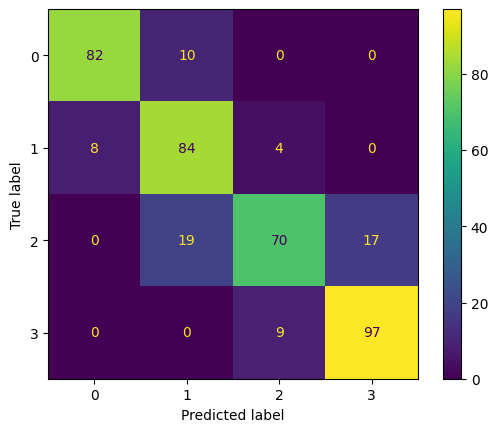

****************************************classification_report****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        92
           1       0.74      0.88      0.80        96
           2       0.84      0.66      0.74       106
           3       0.85      0.92      0.88       106

    accuracy                           0.83       400
   macro avg       0.84      0.84      0.83       400
weighted avg       0.84      0.83      0.83       400

****************************************Accuracy****************************************
Accuracy : 0.8325


In [8]:
def evaluate_model(y_true, y_predicted):
  """
  This function evaluates a classification model by printing classification report
  and plotting the confusion matrix.

  Args:
      y_true (array-like): True labels for the classification task.
      y_predicted (array-like): Predicted labels for the classification task.
  """

  # Print classification report
  print(classification_report(y_true, y_predicted))

  # Generate confusion matrix
  cf_matrix = confusion_matrix(y_true, y_predicted)

  # Create ConfusionMatrixDisplay object
  cmd = ConfusionMatrixDisplay(cf_matrix)

  # Plot the confusion matrix
  cmd.plot()
  plt.show()



#Check the ratios
def Decision_Tree_Classifier_model(df_norm, test_ratio):
    # define x and y
    x = df_norm[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','blue','dual_sim','four_g','three_g','touch_screen','wifi']].values
    y = df_norm['price_range'].values.reshape(-1 ,1)

    # define x and y test & train
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, random_state=1)

    # fit model
    DTC = DecisionTreeClassifier( max_depth = 5,ccp_alpha = 0.007)
    DTC.fit(x_train, y_train)
    y_pred = DTC.predict(x_test)

    # Printing results
    print(colored('*' * 40 + 'confusion_matrix' + '*' * 40, 'red'))
    # print('confusion matrix : \n', confusion_matrix(y_test, y_pred))
    evaluate_model(y_test, y_pred)
    print(colored('*' * 40 + 'classification_report' + '*' * 40, 'green')) 
    print('Classification Report :\n', classification_report(y_test, y_pred))
    print(colored('*' * 40 + 'Accuracy' + '*' * 40, 'black'))
    print ("Accuracy :" , metrics.accuracy_score(y_test , y_pred))
    # cmd.plot()
    # plt.show()


Decision_Tree_Classifier_model(df_norm, 0.2)



### `2. Random Forest Model`

****************************************confusion_matrix****************************************
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        92
           1       0.69      0.73      0.71        96
           2       0.82      0.59      0.69       106
           3       0.84      0.97      0.90       106

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.79       400
weighted avg       0.80      0.80      0.79       400



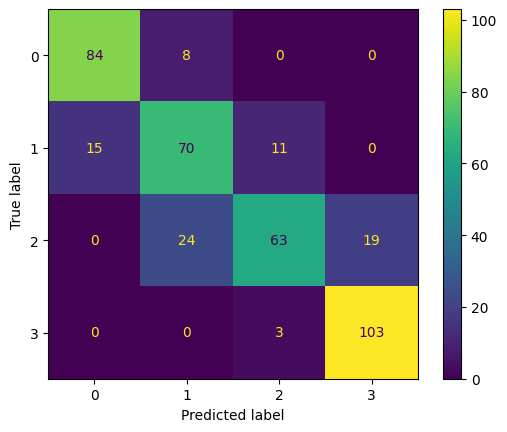

****************************************classification_report****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        92
           1       0.69      0.73      0.71        96
           2       0.82      0.59      0.69       106
           3       0.84      0.97      0.90       106

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.79       400
weighted avg       0.80      0.80      0.79       400

****************************************Accuracy****************************************
Accuracy : 0.8


In [9]:


#Check the ratios
def Random_Forest_Classifier_model(df_norm, test_ratio):
    # define x and y
    x = df_norm[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','blue','dual_sim','four_g','three_g','touch_screen','wifi']].values
    y = df_norm['price_range'].values.reshape(-1 ,1).ravel()

    # define x and y test & train
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, random_state=1)

    # fit model
    RFC = RandomForestClassifier(n_estimators= 50 ,max_depth = 3)
    RFC.fit(x_train, y_train)
    y_pred = RFC.predict(x_test)

    # Printing results
    print(colored('*' * 40 + 'confusion_matrix' + '*' * 40, 'red'))
    # print('confusion matrix : \n', confusion_matrix(y_test, y_pred))
    evaluate_model(y_test, y_pred)
    print(colored('*' * 40 + 'classification_report' + '*' * 40, 'green')) 
    print('Classification Report :\n', classification_report(y_test, y_pred))
    print(colored('*' * 40 + 'Accuracy' + '*' * 40, 'black'))
    print ("Accuracy :" , metrics.accuracy_score(y_test , y_pred))
    


Random_Forest_Classifier_model(df_norm, 0.2)


### `3. Support Vector Machine`

****************************************confusion_matrix****************************************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        92
           1       0.94      0.95      0.94        96
           2       0.93      0.94      0.93       106
           3       0.99      0.96      0.98       106

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



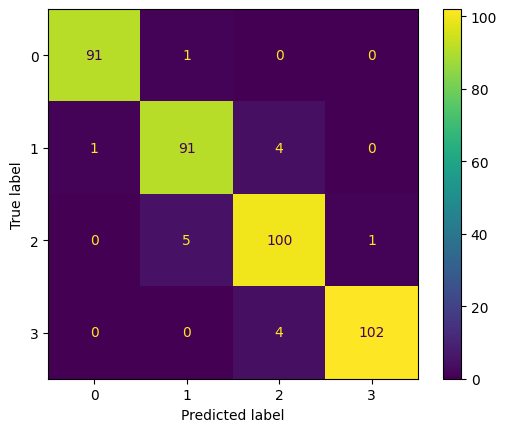

****************************************classification_report****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        92
           1       0.94      0.95      0.94        96
           2       0.93      0.94      0.93       106
           3       0.99      0.96      0.98       106

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

****************************************Accuracy****************************************
Accuracy : 0.96


In [10]:
#Check the ratios
def svm_Classifier_model(df_norm, test_ratio):
    # define x and y
    x = df_norm[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','blue','dual_sim','four_g','three_g','touch_screen','wifi']].values
    y = df_norm['price_range'].values.reshape(-1 ,1).ravel()

    # define x and y test & train
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, random_state=1)

    # fit model
    svm_model = SVC(kernel='linear', C=1)
    svm_model.fit(x_train, y_train.ravel())
    y_pred = svm_model.predict(x_test)

    # Printing results
    print(colored('*' * 40 + 'confusion_matrix' + '*' * 40, 'red'))
    # print('confusion matrix : \n', confusion_matrix(y_test, y_pred))
    evaluate_model(y_test, y_pred)
    print(colored('*' * 40 + 'classification_report' + '*' * 40, 'green')) 
    print('Classification Report :\n', classification_report(y_test, y_pred))
    print(colored('*' * 40 + 'Accuracy' + '*' * 40, 'black'))
    print ("Accuracy :" , metrics.accuracy_score(y_test , y_pred))
    
    # save model
    with open("model_svm.pkl", "wb") as f:
        pickle.dump(svm_model, f)

svm_Classifier_model(df_norm, 0.2)


In [11]:

    # define x and y
x = df_norm[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','blue','dual_sim','four_g','three_g','touch_screen','wifi']].values
y = df_norm['price_range'].values.reshape(-1 ,1).ravel()

    # define x and y test & train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

    # fit model
svm_Final = SVC(kernel='linear', C=1) 
print(f"\nTraining Model with 80% training data and 20% test data:")    
    # Cross-validation
scores = cross_val_score(svm_Final, x, y, cv=5, scoring='accuracy')
print(colored('*' * 45 + 'Score results in kfold' + '*' * 45, 'yellow'))
print('score each fold', scores)
print('mean score', np.mean(scores))

svm_Final.fit(x_train, y_train.ravel())
y_pred = svm_Final.predict(x_test)

    # Classification Report and Score for Test Data
print(colored('*' * 51 + 'Test Data' + '*' * 51, 'black'))
print(colored('*' * 40 + 'Classification Report_ Test Data' + '*' * 40, 'red'))
print( classification_report(y_test, y_pred))    
print(colored('*' * 40 + 'confusion_matrix_ Test Data' + '*' * 40, 'green'))
print(confusion_matrix(y_test, y_pred))
print(colored('*' * 52 + 'Accuracy' + '*' * 52, 'blue'))
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

    # Classification Report and Score for Training Data
print(colored('*' * 50 + 'Training Data' + '*' * 50, 'black'))
print(colored('*' * 40 + 'Classification Report_ Training Data' + '*' * 40, 'red'))
print(classification_report(y_train, svm_Final.predict(x_train)))
print(colored('*' * 40 + 'confusion_matrix_ Training Data' + '*' * 40, 'green'))
print(confusion_matrix(y_train, svm_Final.predict(x_train)))
print(colored('*' * 52 + 'Accuracy' + '*' * 52, 'blue'))
print("Accuracy :", metrics.accuracy_score(y_train, svm_Final.predict(x_train)))
    
    






Training Model with 80% training data and 20% test data:
*********************************************Score results in kfold*********************************************
score each fold [0.9675 0.96   0.97   0.955  0.9725]
mean score 0.9650000000000001
***************************************************Test Data***************************************************
****************************************Classification Report_ Test Data****************************************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        92
           1       0.94      0.95      0.94        96
           2       0.93      0.94      0.93       106
           3       0.99      0.96      0.98       106

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

****************************************confusion_matrix_ Test Data*******************